In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# Clean Crime Data

- First, I'll bring in the raw data file for 2020 Louisville Crime data so that I can see what I'm working with. I'll assign it to variable df20 so that it can be more easily managed.

In [291]:
df20 = pd.read_csv('assets/Louisville_Metro_KY_-_Crime_Data_2020.csv', low_memory=False)

- Let's check the dataframe to see what we're working with.

In [292]:
df20.head(3)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,ObjectId
0,80-20-000117,2020/01/01 13:50:00,2019/12/31 03:30:00,FRAUD,FRAUD USE OF CREDIT CARD AFTER REPT LOST/STOLE...,26B,PART II,COMPLETED,4TH DIVISION,435,SERVICE / GAS STATION,4100 BLOCK TAYLOR BLVD ...,LOUISVILLE,40215,1
1,80-20-000292,2020/01/02 10:45:00,2019/12/31 18:00:00,THEFT/LARCENY,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",23H,PART I,COMPLETED,6TH DIVISION,613,NON-ATTACHED RESD GARAGE/SHED/BULD,5200 BLOCK RUSSETT BLVD ...,LOUISVILLE,40218,2
2,80-19-096135,2020/01/01 00:26:00,2019/12/31 23:30:00,VEHICLE BREAK-IN/THEFT,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,23F,PART I,COMPLETED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,S 16TH ST / W CHESTNUT ST ...,LOUISVILLE,40203,3


- Let's isolate the columns so that we can drop those that are unnecessary for the analysis.

In [293]:
df20.columns

Index(['INCIDENT_NUMBER', 'DATE_REPORTED', 'DATE_OCCURED', 'CRIME_TYPE',
       'UOR_DESC', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP', 'LMPD_DIVISION',
       'LMPD_BEAT', 'PREMISE_TYPE', 'BLOCK_ADDRESS', 'City', 'ZIP_CODE',
       'ObjectId'],
      dtype='object')

- Collect all unneccesary colums into a variable.

In [294]:
dropped_columns = ['INCIDENT_NUMBER','UOR_DESC', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP','LMPD_DIVISION', 'ObjectId', 'LMPD_BEAT','PREMISE_TYPE', 'BLOCK_ADDRESS', 'City', 'ZIP_CODE', 'DATE_OCCURED']

- For the purposes of my analysis, I'm going to discard any columns that have no discernible effect on the data to be analyzed. To save these changes to the original dataset I'll use the inplace= True parameter. Using the dropped_columns variable, I'll neatly drop the columns I don't need.

In [295]:
df20.drop(columns= dropped_columns,inplace= True)


- Here, I'm calling the .head function again in order to make sure that the previous function call executed correctly.

In [296]:
df20.head(1)

,DATE_REPORTED,CRIME_TYPE
0,2020/01/01 13:50:00,FRAUD


In [297]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70233 entries, 0 to 70232
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_REPORTED  70233 non-null  object
 1   CRIME_TYPE     70233 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


- Let's clean the dataframe up a bit more.

In [298]:
# Let's rename and reformat these columns.
df20.rename(columns={'DATE_REPORTED': 'date', 'CRIME_TYPE': 'crime'},inplace=True)

In [299]:
# Convert the date column to datetime and simplify dates to month/year format. Changing date/time settings: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df20['date']= df20['date'].astype('datetime64[ns]')

# Check work
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70233 entries, 0 to 70232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    70233 non-null  datetime64[ns]
 1   crime   70233 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ MB


In [300]:
# Drop rows with null values.
df20= df20.dropna()
df20

,date,crime
0,2020-01-01 13:50:00,FRAUD
1,2020-01-02 10:45:00,THEFT/LARCENY
2,2020-01-01 00:26:00,VEHICLE BREAK-IN/THEFT
3,2020-01-01 23:57:00,VANDALISM
4,2020-01-02 11:02:00,VEHICLE BREAK-IN/THEFT
...,...,...
70228,2020-12-31 16:09:00,VEHICLE BREAK-IN/THEFT
70229,2020-12-31 15:38:00,ASSAULT
70230,2020-12-31 16:25:00,VEHICLE BREAK-IN/THEFT
70231,2020-12-31 15:39:00,ASSAULT


In [301]:
# Add a running count of crime types in a new column
df20['crime_totals'] = df20.groupby('crime').cumcount() + 1
df20


,date,crime,crime_totals
0,2020-01-01 13:50:00,FRAUD,1
1,2020-01-02 10:45:00,THEFT/LARCENY,1
2,2020-01-01 00:26:00,VEHICLE BREAK-IN/THEFT,1
3,2020-01-01 23:57:00,VANDALISM,1
4,2020-01-02 11:02:00,VEHICLE BREAK-IN/THEFT,2
...,...,...,...
70228,2020-12-31 16:09:00,VEHICLE BREAK-IN/THEFT,6770
70229,2020-12-31 15:38:00,ASSAULT,15948
70230,2020-12-31 16:25:00,VEHICLE BREAK-IN/THEFT,6771
70231,2020-12-31 15:39:00,ASSAULT,15949


# Clean Louisville, KY Covid-19 Data

In [302]:
# source: https://health.google.com/covid-19/open-data/explorer?loc=US_KY_21111
covid= pd.read_csv('assets/US_KY_21111.csv')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Columns: 450 entries, location_key to relative_humidity
dtypes: float64(422), int64(16), object(12)
memory usage: 3.4+ MB


In [303]:
# Use list() to print entire columns list to screen. Without it, the columns are truncated.
list(covid.columns)


['location_key',
 'date',
 'place_id',
 'wikidata_id',
 'datacommons_id',
 'country_code',
 'country_name',
 'subregion1_code',
 'subregion1_name',
 'subregion2_code',
 'subregion2_name',
 'iso_3166_1_alpha_2',
 'iso_3166_1_alpha_3',
 'aggregation_level',
 'new_confirmed',
 'new_deceased',
 'cumulative_confirmed',
 'cumulative_deceased',
 'new_persons_fully_vaccinated',
 'cumulative_persons_fully_vaccinated',
 'population',
 'population_male',
 'population_female',
 'population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older',
 'openstreetmap_id',
 'latitude',
 'longitude',
 'area_sq_km',
 'life_expectancy',
 'mobility_retail_and_recreation',
 'mobility_grocery_and_pharmacy',
 'mobility_parks',
 'mobility_transit_stations',
 'mobility_workplaces',
 'mobility_residential',
 'search_trends_abdominal_obesity',
 'search_tre

In [304]:
dropped_columns = [
    'location_key', 
    'subregion1_name',
    'subregion2_name',
    'place_id',
    'wikidata_id',
    'datacommons_id',
    'country_code',
    'country_name',
    'subregion1_code',
    'subregion2_code',
    'iso_3166_1_alpha_2',
    'iso_3166_1_alpha_3',
    'aggregation_level',
    'openstreetmap_id',
    'latitude',
    'longitude',
    'area_sq_km',
    'mobility_retail_and_recreation',
    'mobility_grocery_and_pharmacy',
    'mobility_parks',
    'mobility_transit_stations',
    'mobility_workplaces',
    'mobility_residential',
    'search_trends_abdominal_obesity',
    'search_trends_abdominal_pain',
    'search_trends_acne',
    'search_trends_actinic_keratosis',
    'search_trends_acute_bronchitis',
    'search_trends_adrenal_crisis',
    'search_trends_ageusia',
    'search_trends_alcoholism',
    'search_trends_allergy',
    'search_trends_amblyopia',
    'search_trends_amenorrhea',
    'search_trends_amnesia',
    'search_trends_anal_fissure',
    'search_trends_anaphylaxis',
    'search_trends_anemia',
    'search_trends_angina_pectoris',
    'search_trends_angioedema',
    'search_trends_anosmia',
    'search_trends_anxiety',
    'search_trends_aphasia',
    'search_trends_apnea',
    'search_trends_arthralgia',
    'search_trends_arthritis',
    'search_trends_ascites',
    'search_trends_asperger_syndrome',
    'search_trends_asphyxia',
    'search_trends_asthma',
    'search_trends_astigmatism',
    'search_trends_ataxia',
    'search_trends_atheroma',
    'search_trends_attention_deficit_hyperactivity_disorder',
    'search_trends_autoimmune_disease',
    'search_trends_avoidant_personality_disorder',
    'search_trends_back_pain',
    'search_trends_bacterial_vaginosis',
    'search_trends_balance_disorder',
    'search_trends_beaus_lines',
    'search_trends_bells_palsy',
    'search_trends_biliary_colic',
    'search_trends_binge_eating',
    'search_trends_bleeding',
    'search_trends_bleeding_on_probing',
    'search_trends_blepharospasm',
    'search_trends_bloating',
    'search_trends_blood_in_stool',
    'search_trends_blurred_vision',
    'search_trends_blushing',
    'search_trends_boil',
    'search_trends_bone_fracture',
    'search_trends_bone_tumor',
    'search_trends_bowel_obstruction',
    'search_trends_bradycardia',
    'search_trends_braxton_hicks_contractions',
    'search_trends_breakthrough_bleeding',
    'search_trends_breast_pain',
    'search_trends_bronchitis',
    'search_trends_bruise',
    'search_trends_bruxism',
    'search_trends_bunion',
    'search_trends_burn',
    'search_trends_burning_mouth_syndrome',
    'search_trends_candidiasis',
    'search_trends_canker_sore',
    'search_trends_cardiac_arrest',
    'search_trends_carpal_tunnel_syndrome',
    'search_trends_cataplexy',
    'search_trends_cataract',
    'search_trends_chancre',
    'search_trends_cheilitis',
    'search_trends_chest_pain',
    'search_trends_chills',
    'search_trends_chorea',
    'search_trends_chronic_pain',
    'search_trends_cirrhosis',
    'search_trends_cleft_lip_and_cleft_palate',
    'search_trends_clouding_of_consciousness',
    'search_trends_cluster_headache',
    'search_trends_colitis',
    'search_trends_coma',
    'search_trends_common_cold',
    'search_trends_compulsive_behavior',
    'search_trends_compulsive_hoarding',
    'search_trends_confusion',
    'search_trends_congenital_heart_defect',
    'search_trends_conjunctivitis',
    'search_trends_constipation',
    'search_trends_convulsion',
    'search_trends_cough',
    'search_trends_cramp',
    'search_trends_crepitus',
    'search_trends_croup',
    'search_trends_cyanosis',
    'search_trends_dandruff',
    'search_trends_delayed_onset_muscle_soreness',
    'search_trends_dementia',
    'search_trends_dentin_hypersensitivity',
    'search_trends_depersonalization',
    'search_trends_depression',
    'search_trends_dermatitis',
    'search_trends_desquamation',
    'search_trends_developmental_disability',
    'search_trends_diabetes',
    'search_trends_diabetic_ketoacidosis',
    'search_trends_diarrhea',
    'search_trends_dizziness',
    'search_trends_dry_eye_syndrome',
    'search_trends_dysgeusia',
    'search_trends_dysmenorrhea',
    'search_trends_dyspareunia',
    'search_trends_dysphagia',
    'search_trends_dysphoria',
    'search_trends_dystonia',
    'search_trends_dysuria',
    'search_trends_ear_pain',
    'search_trends_eczema',
    'search_trends_edema',
    'search_trends_encephalitis',
    'search_trends_encephalopathy',
    'search_trends_epidermoid_cyst',
    'search_trends_epilepsy',
    'search_trends_epiphora',
    'search_trends_erectile_dysfunction',
    'search_trends_erythema',
    'search_trends_erythema_chronicum_migrans',
    'search_trends_esophagitis',
    'search_trends_excessive_daytime_sleepiness',
    'search_trends_eye_pain',
    'search_trends_eye_strain',
    'search_trends_facial_nerve_paralysis',
    'search_trends_facial_swelling',
    'search_trends_fasciculation',
    'search_trends_fatigue',
    'search_trends_fatty_liver_disease',
    'search_trends_fecal_incontinence',
    'search_trends_fever',
    'search_trends_fibrillation',
    'search_trends_fibrocystic_breast_changes',
    'search_trends_fibromyalgia',
    'search_trends_flatulence',
    'search_trends_floater',
    'search_trends_focal_seizure',
    'search_trends_folate_deficiency',
    'search_trends_food_craving',
    'search_trends_food_intolerance',
    'search_trends_frequent_urination',
    'search_trends_gastroesophageal_reflux_disease',
    'search_trends_gastroparesis',
    'search_trends_generalized_anxiety_disorder',
    'search_trends_genital_wart',
    'search_trends_gingival_recession',
    'search_trends_gingivitis',
    'search_trends_globus_pharyngis',
    'search_trends_goitre',
    'search_trends_gout',
    'search_trends_grandiosity',
    'search_trends_granuloma',
    'search_trends_guilt',
    'search_trends_hair_loss',
    'search_trends_halitosis',
    'search_trends_hay_fever',
    'search_trends_headache',
    'search_trends_heart_arrhythmia',
    'search_trends_heart_murmur',
    'search_trends_heartburn',
    'search_trends_hematochezia',
    'search_trends_hematoma',
    'search_trends_hematuria',
    'search_trends_hemoptysis',
    'search_trends_hemorrhoids',
    'search_trends_hepatitis',
    'search_trends_hepatotoxicity',
    'search_trends_hiccup',
    'search_trends_hip_pain',
    'search_trends_hives',
    'search_trends_hot_flash',
    'search_trends_hydrocephalus',
    'search_trends_hypercalcaemia',
    'search_trends_hypercholesterolemia',
    'search_trends_hyperemesis_gravidarum',
    'search_trends_hyperglycemia',
    'search_trends_hyperhidrosis',
    'search_trends_hyperkalemia',
    'search_trends_hyperlipidemia',
    'search_trends_hypermobility',
    'search_trends_hyperpigmentation',
    'search_trends_hypersomnia',
    'search_trends_hypertension',
    'search_trends_hyperthermia',
    'search_trends_hyperthyroidism',
    'search_trends_hypertriglyceridemia',
    'search_trends_hypertrophy',
    'search_trends_hyperventilation',
    'search_trends_hypocalcaemia',
    'search_trends_hypochondriasis',
    'search_trends_hypoglycemia',
    'search_trends_hypogonadism',
    'search_trends_hypokalemia',
    'search_trends_hypomania',
    'search_trends_hyponatremia',
    'search_trends_hypotension',
    'search_trends_hypothyroidism',
    'search_trends_hypoxemia',
    'search_trends_hypoxia',
    'search_trends_impetigo',
    'search_trends_implantation_bleeding',
    'search_trends_impulsivity',
    'search_trends_indigestion',
    'search_trends_infection',
    'search_trends_inflammation',
    'search_trends_inflammatory_bowel_disease',
    'search_trends_ingrown_hair',
    'search_trends_insomnia',
    'search_trends_insulin_resistance',
    'search_trends_intermenstrual_bleeding',
    'search_trends_intracranial_pressure',
    'search_trends_iron_deficiency',
    'search_trends_irregular_menstruation',
    'search_trends_itch',
    'search_trends_jaundice',
    'search_trends_kidney_failure',
    'search_trends_kidney_stone',
    'search_trends_knee_pain',
    'search_trends_kyphosis',
    'search_trends_lactose_intolerance',
    'search_trends_leg_cramps',
    'search_trends_lesion',
    'search_trends_leukorrhea',
    'search_trends_lightheadedness',
    'search_trends_low_back_pain',
    'search_trends_low_grade_fever',
    'search_trends_lymphedema',
    'search_trends_major_depressive_disorder',
    'search_trends_malabsorption',
    'search_trends_male_infertility',
    'search_trends_manic_disorder',
    'search_trends_melasma',
    'search_trends_melena',
    'search_trends_meningitis',
    'search_trends_menorrhagia',
    'search_trends_middle_back_pain',
    'search_trends_migraine',
    'search_trends_milium',
    'search_trends_mitral_insufficiency',
    'search_trends_mood_disorder',
    'search_trends_mood_swing',
    'search_trends_morning_sickness',
    'search_trends_motion_sickness',
    'search_trends_mouth_ulcer',
    'search_trends_muscle_atrophy',
    'search_trends_muscle_weakness',
    'search_trends_myalgia',
    'search_trends_mydriasis',
    'search_trends_myocardial_infarction',
    'search_trends_nasal_congestion',
    'search_trends_nausea',
    'search_trends_neck_mass',
    'search_trends_neck_pain',
    'search_trends_neonatal_jaundice',
    'search_trends_nerve_injury',
    'search_trends_neuralgia',
    'search_trends_neutropenia',
    'search_trends_night_sweats',
    'search_trends_night_terror',
    'search_trends_nocturnal_enuresis',
    'search_trends_nodule',
    'search_trends_nosebleed',
    'search_trends_nystagmus',
    'search_trends_obesity',
    'search_trends_onychorrhexis',
    'search_trends_oral_candidiasis',
    'search_trends_orthostatic_hypotension',
    'search_trends_osteopenia',
    'search_trends_osteophyte',
    'search_trends_osteoporosis',
    'search_trends_otitis',
    'search_trends_otitis_externa',
    'search_trends_otitis_media',
    'search_trends_pain',
    'search_trends_palpitations',
    'search_trends_pancreatitis',
    'search_trends_panic_attack',
    'search_trends_papule',
    'search_trends_paranoia',
    'search_trends_paresthesia',
    'search_trends_pelvic_inflammatory_disease',
    'search_trends_pericarditis',
    'search_trends_periodontal_disease',
    'search_trends_periorbital_puffiness',
    'search_trends_peripheral_neuropathy',
    'search_trends_perspiration',
    'search_trends_petechia',
    'search_trends_phlegm',
    'search_trends_photophobia',
    'search_trends_photopsia',
    'search_trends_pleural_effusion',
    'search_trends_pleurisy',
    'search_trends_pneumonia',
    'search_trends_podalgia',
    'search_trends_polycythemia',
    'search_trends_polyneuropathy',
    'search_trends_polyuria',
    'search_trends_poor_posture',
    'search_trends_post_nasal_drip',
    'search_trends_postural_orthostatic_tachycardia_syndrome',
    'search_trends_prediabetes',
    'search_trends_proteinuria',
    'search_trends_pruritus_ani',
    'search_trends_psychosis',
    'search_trends_ptosis',
    'search_trends_pulmonary_edema',
    'search_trends_pulmonary_hypertension',
    'search_trends_purpura',
    'search_trends_pus',
    'search_trends_pyelonephritis',
    'search_trends_radiculopathy',
    'search_trends_rectal_prolapse',
    'search_trends_red_eye',
    'search_trends_renal_colic',
    'search_trends_restless_legs_syndrome',
    'search_trends_rheum',
    'search_trends_rhinitis',
    'search_trends_rhinorrhea',
    'search_trends_rosacea',
    'search_trends_round_ligament_pain',
    'search_trends_rumination',
    'search_trends_scar',
    'search_trends_sciatica',
    'search_trends_scoliosis',
    'search_trends_seborrheic_dermatitis',
    'search_trends_self_harm',
    'search_trends_sensitivity_to_sound',
    'search_trends_sexual_dysfunction',
    'search_trends_sharp_pain',
    'search_trends_shivering',
    'search_trends_shortness_of_breath',
    'search_trends_shyness',
    'search_trends_sinusitis',
    'search_trends_skin_condition',
    'search_trends_skin_rash',
    'search_trends_skin_tag',
    'search_trends_skin_ulcer',
    'search_trends_sleep_apnea',
    'search_trends_sleep_deprivation',
    'search_trends_sleep_disorder',
    'search_trends_snoring',
    'search_trends_sore_throat',
    'search_trends_spasticity',
    'search_trends_splenomegaly',
    'search_trends_sputum',
    'search_trends_stomach_rumble',
    'search_trends_strabismus',
    'search_trends_stretch_marks',
    'search_trends_stroke',
    'search_trends_stuttering',
    'search_trends_subdural_hematoma',
    'search_trends_suicidal_ideation',
    'search_trends_swelling',
    'search_trends_swollen_feet',
    'search_trends_swollen_lymph_nodes',
    'search_trends_syncope',
    'search_trends_tachycardia',
    'search_trends_tachypnea',
    'search_trends_telangiectasia',
    'search_trends_tenderness',
    'search_trends_testicular_pain',
    'search_trends_throat_irritation',
    'search_trends_thrombocytopenia',
    'search_trends_thyroid_nodule',
    'search_trends_tic',
    'search_trends_tinnitus',
    'search_trends_tonsillitis',
    'search_trends_toothache',
    'search_trends_tremor',
    'search_trends_trichoptilosis',
    'search_trends_tumor',
    'search_trends_type_2_diabetes',
    'search_trends_unconsciousness',
    'search_trends_underweight',
    'search_trends_upper_respiratory_tract_infection',
    'search_trends_urethritis',
    'search_trends_urinary_incontinence',
    'search_trends_urinary_tract_infection',
    'search_trends_uterine_contraction',
    'search_trends_vaginal_bleeding',
    'search_trends_vaginal_discharge',
    'search_trends_vaginitis',
    'search_trends_varicose_veins',
    'search_trends_vasculitis',
    'search_trends_ventricular_tachycardia',
    'search_trends_vertigo',
    'search_trends_visual_acuity',
    'search_trends_vomiting',
    'search_trends_wart',
    'search_trends_water_retention',
    'search_trends_weakness',
    'search_trends_weight_gain',
    'search_trends_wheeze',
    'search_trends_xeroderma',
    'search_trends_xerostomia',
    'search_trends_yawn',
    'average_temperature_celsius',
    'minimum_temperature_celsius',
    'maximum_temperature_celsius',
    'rainfall_mm',
    'snowfall_mm',
    'dew_point',
    'relative_humidity']

In [305]:
# Drop unnecessary columns
covid.drop(columns= dropped_columns, inplace=True)

# Check dataframe
covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 991 non-null    object 
 1   new_confirmed                        796 non-null    float64
 2   new_deceased                         796 non-null    float64
 3   cumulative_confirmed                 797 non-null    float64
 4   cumulative_deceased                  797 non-null    float64
 5   new_persons_fully_vaccinated         492 non-null    float64
 6   cumulative_persons_fully_vaccinated  493 non-null    float64
 7   population                           991 non-null    int64  
 8   population_male                      991 non-null    int64  
 9   population_female                    991 non-null    int64  
 10  population_age_00_09                 991 non-null    int64  
 11  population_age_10_19            

In [306]:
# Rename columns for clarity
covid.rename(columns={'population':'total_population'}, inplace=True)

# Check work
covid.head(3)

,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,total_population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,life_expectancy
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,769828,372253,397575,95970,93544,108926,104213,93095,103881,91239,49192,29768,76.061538
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,769828,372253,397575,95970,93544,108926,104213,93095,103881,91239,49192,29768,76.061538
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,769828,372253,397575,95970,93544,108926,104213,93095,103881,91239,49192,29768,76.061538


In [307]:
# all population data shows no change accross the data set so I will actually go ahead and drop those columns as well.
covid = covid.drop(columns=['total_population',
 'population_male',
 'population_female',
 'population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older',
 'life_expectancy'])

# Check work
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 991 non-null    object 
 1   new_confirmed                        796 non-null    float64
 2   new_deceased                         796 non-null    float64
 3   cumulative_confirmed                 797 non-null    float64
 4   cumulative_deceased                  797 non-null    float64
 5   new_persons_fully_vaccinated         492 non-null    float64
 6   cumulative_persons_fully_vaccinated  493 non-null    float64
dtypes: float64(6), object(1)
memory usage: 54.3+ KB


In [308]:
# Convert dates to datetime
covid['date'] = covid['date'].astype('datetime64[ns]')

# Check dataframe
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 991 non-null    datetime64[ns]
 1   new_confirmed                        796 non-null    float64       
 2   new_deceased                         796 non-null    float64       
 3   cumulative_confirmed                 797 non-null    float64       
 4   cumulative_deceased                  797 non-null    float64       
 5   new_persons_fully_vaccinated         492 non-null    float64       
 6   cumulative_persons_fully_vaccinated  493 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 54.3 KB


In [309]:
# We're only focusing on data from 2020 and 2021 so let's filter this data frame to display only data within those years.
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2021-12-31')

covid = covid[(covid['date'] >= start_date) & (covid['date'] <= end_date)]
covid


,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
726,2021-12-27,1621.0,24.0,135643.0,1826.0,1201.0,465105.0
727,2021-12-28,1205.0,4.0,136848.0,1830.0,180.0,465285.0
728,2021-12-29,1558.0,4.0,138406.0,1834.0,351.0,465636.0
729,2021-12-30,1084.0,0.0,139490.0,1834.0,509.0,466145.0


# Test Joining of Covid and Crime

In [310]:
combined = pd.merge(covid, df20, how='outer', on='date')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70938 entries, 0 to 70937
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 70938 non-null  datetime64[ns]
 1   new_confirmed                        675 non-null    float64       
 2   new_deceased                         675 non-null    float64       
 3   cumulative_confirmed                 676 non-null    float64       
 4   cumulative_deceased                  676 non-null    float64       
 5   new_persons_fully_vaccinated         249 non-null    float64       
 6   cumulative_persons_fully_vaccinated  250 non-null    float64       
 7   crime                                70233 non-null  object        
 8   crime_totals                         70233 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 5.4+ MB


In [311]:
# Create a simplified date column in Month/Year format. This, unfortunately creates a date column with an object date type.
combined['month_year'] = combined['date'].dt.strftime('%B %Y')

In [312]:
# Display columns for in order to reorder them in final data frame.
combined.columns

Index(['date', 'new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'crime', 'crime_totals',
       'month_year'],
      dtype='object')

In [313]:
# Assign reorderd columns to a new variable.
reordered_df= ['date', 'month_year', 'new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'crime', 'crime_totals' ]
# Assign original df to newly created reordered df.
combined= combined[reordered_df]
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70938 entries, 0 to 70937
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 70938 non-null  datetime64[ns]
 1   month_year                           70938 non-null  object        
 2   new_confirmed                        675 non-null    float64       
 3   new_deceased                         675 non-null    float64       
 4   cumulative_confirmed                 676 non-null    float64       
 5   cumulative_deceased                  676 non-null    float64       
 6   new_persons_fully_vaccinated         249 non-null    float64       
 7   cumulative_persons_fully_vaccinated  250 non-null    float64       
 8   crime                                70233 non-null  object        
 9   crime_totals                         70233 non-null  float64       
dtypes: datetim

In [314]:
# Sort data frame by date
combined= combined.sort_values(by=['date'])
combined

,date,month_year,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,crime,crime_totals
0,2020-01-01 00:00:00,January 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,2020-01-01 00:13:00,January 2020,NaN,NaN,NaN,NaN,NaN,NaN,ASSAULT,1.0
750,2020-01-01 00:13:00,January 2020,NaN,NaN,NaN,NaN,NaN,NaN,DISTURBING THE PEACE,1.0
746,2020-01-01 00:26:00,January 2020,NaN,NaN,NaN,NaN,NaN,NaN,VEHICLE BREAK-IN/THEFT,1.0
778,2020-01-01 00:31:00,January 2020,NaN,NaN,NaN,NaN,NaN,NaN,VANDALISM,4.0
...,...,...,...,...,...,...,...,...,...,...
739,2021-12-27 00:00:00,December 2021,1621.0,24.0,135643.0,1826.0,1201.0,465105.0,NaN,NaN
740,2021-12-28 00:00:00,December 2021,1205.0,4.0,136848.0,1830.0,180.0,465285.0,NaN,NaN
741,2021-12-29 00:00:00,December 2021,1558.0,4.0,138406.0,1834.0,351.0,465636.0,NaN,NaN
742,2021-12-30 00:00:00,December 2021,1084.0,0.0,139490.0,1834.0,509.0,466145.0,NaN,NaN


# Visualizations

### Fun with Pivot tables

In [315]:
# List all of the unique values within the month_year column that we created earlier.
list(combined['month_year'].unique())

['January 2020',
 'February 2020',
 'March 2020',
 'April 2020',
 'May 2020',
 'June 2020',
 'July 2020',
 'August 2020',
 'September 2020',
 'October 2020',
 'November 2020',
 'December 2020',
 'January 2021',
 'February 2021',
 'March 2021',
 'April 2021',
 'May 2021',
 'June 2021',
 'July 2021',
 'August 2021',
 'September 2021',
 'October 2021',
 'November 2021',
 'December 2021']

In [316]:
# Create a pivot_table focused on the crime utilizing the unique list created above.
pivot_table = pd.pivot_table(
    data=combined,
    values='crime_totals',
    index='crime',
    columns=['month_year'],
    aggfunc='count'
)
sorted_columns= ['January 2020',
 'February 2020',
 'March 2020',
 'April 2020',
 'May 2020',
 'June 2020',
 'July 2020',
 'August 2020',
 'September 2020',
 'October 2020',
 'November 2020',
 'December 2020',
]
pivot_table= pivot_table[sorted_columns]
pivot_table


month_year,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020
crime,,,,,,,,,,,,
ARSON,13.0,10.0,8.0,9.0,23.0,27.0,16.0,13.0,15.0,15.0,11.0,12.0
ASSAULT,1062.0,1003.0,1222.0,1201.0,1440.0,1556.0,1530.0,1529.0,1366.0,1407.0,1317.0,1316.0
BURGLARY,306.0,285.0,356.0,376.0,359.0,484.0,488.0,488.0,540.0,528.0,414.0,387.0
DISTURBING THE PEACE,32.0,33.0,25.0,32.0,37.0,35.0,23.0,31.0,31.0,38.0,22.0,17.0
DRUGS/ALCOHOL VIOLATIONS,648.0,521.0,489.0,465.0,624.0,194.0,161.0,270.0,267.0,382.0,318.0,344.0
DUI,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRAUD,369.0,304.0,285.0,205.0,267.0,242.0,245.0,228.0,213.0,253.0,272.0,294.0
HOMICIDE,12.0,8.0,10.0,12.0,11.0,12.0,21.0,20.0,19.0,17.0,10.0,21.0
MOTOR VEHICLE THEFT,306.0,274.0,287.0,357.0,305.0,446.0,514.0,451.0,380.0,422.0,434.0,471.0


##### - Creating this pivot table helps us see the number of crimes reported per month by crime type. Creating this table will help me create a figure below.

### Initial visualisation

Text(0.5, 1.0, '2020 Covid-19 Confirmed Cases in Louisville, KY')

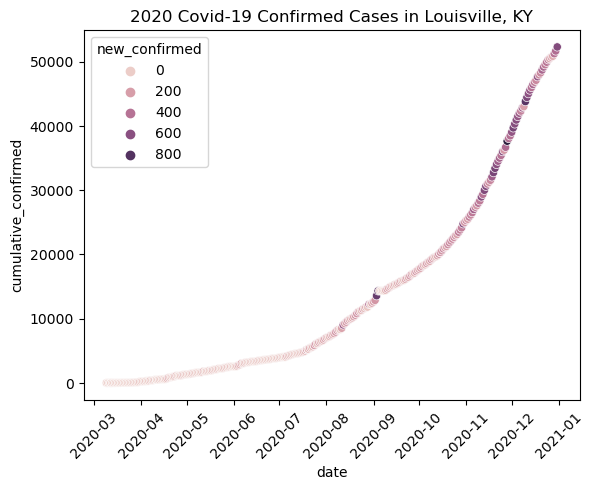

In [317]:
# Create neater data for visualizing 2020 covid data alone
start_date = '2020-01-01'
end_date = '2020-12-31'
dated_df = combined[(combined['date']>= start_date) & (combined['date']<= end_date)]

# Visualize the progression of confirmed covid cases throughout 2020.
sns.scatterplot(data= dated_df, x= 'date', y='cumulative_confirmed', hue='new_confirmed')
plt.xticks(rotation=45)
plt.title('2020 Covid-19 Confirmed Cases in Louisville, KY')

##### - This figure is simply charting the progression of new confirmed cases in the city over 12 months. The hue of the plot points allows us to see which months recorded more newly infected individuals.

In [318]:
# sns.lineplot(data=total_crime_df, y="crime", x= 'date')
# plt.xticks(rotation=45)

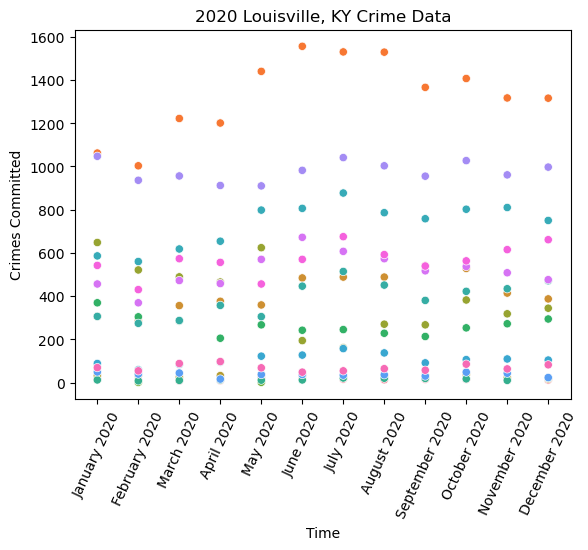

In [319]:
# Crime data for Louisville, KY in 2020
# crime_df= dated_df[dated_df['crime']=='ASSAULT']

# using pivot_table
pivot_table.reset_index(inplace=True)
melted_table = pd.melt(pivot_table, id_vars='crime', var_name='month_year', value_name='crime_totals')

sns.scatterplot(data= melted_table, hue='crime', y='crime_totals', x='month_year')
plt.ylabel('Crimes Committed')
plt.xlabel('Time')
plt.xticks(rotation=65)
plt.title('2020 Louisville, KY Crime Data')
# plt.figure(figsize=(20, 30))
plt.legend(loc='best').remove()

# legend_fig = plt.figure(figsize=(10, 4))
# plt.legend(title='Crimes', labels=melted_table['crime'].unique(), loc='center')

##### - The above scatterplot is showing us the number of crimes committed per month in 2020. You'll notice that each month has an assortment of colors being represented. These are different types of crimes being commited and they can be seen in the pivot table that I created earlier. I intended for this figure to provide crime data at a glance to show you how the crime numbers changed throughout the year.

In [320]:
# sns.displot(data=crime_df, x="crime", col="date", kde=True)



With our newly cleaned data, let's start deriving some initial insights from it. Let's simple and...

In [321]:
# plt.bar(ndf['ZIP_CODE'], len(ndf['CRIME_TYPE']))
# plt.show()
# ndf.plot(kind = 'bar', x = 'ZIP_CODE', y = [len("CRIME_TYPE")])
